# pymc3使用初探

In [106]:
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats
from random import shuffle
from collections import Counter
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

In [107]:
# 产生所需要的数据
# 总共三十次
total = 30
# 正面11次
n_heads = 5
# 反面次数，总次数减去正面的次数
n_tails = total - n_heads
# 用0 1 来代表每一次
tosses = [1] * n_heads + [0] * n_tails
shuffle(tosses)
print(tosses)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


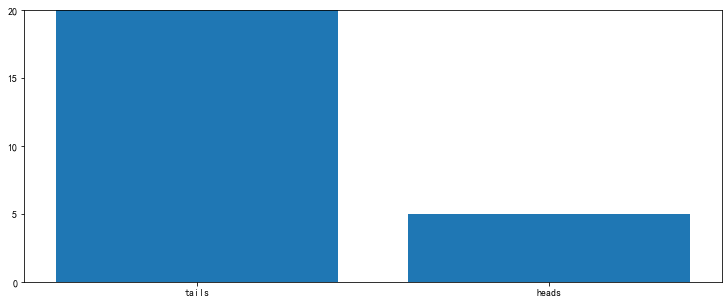

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(list(Counter(tosses).keys()), list(Counter(tosses).values()))
ax.set_xticks([0, 1])
ax.set_xticklabels(['tails', 'heads'])
ax.set_ylim(0, 20)
ax.set_yticks(np.arange(0, 21, 5))

In [115]:
# 利用with上下文管理器，创建一个容器，所有的推断都在名为coin_model的Model中进行
# 都是以这句开头, with pm.Models() as 自己取个名字: 
with pm.Model() as coin_model:
    # 下面是不同的先验，我们认为，这枚硬币正面朝上的概率是0-1之间任一的数值
    p_prior=pm.Uniform('p',0,1)
    #p_prior=pm.Normal('p', mu=0.5, sigma=1)
    #p_prior=pm.Beta('p', alpha=1, beta=1)
    # 针对于实验样本，每一次抛掷都是一次伯努利分布，即非正即反，概率的话，用的是我们的先验的分布，而观测数据，则是我们的样本数据
    like = pm.Bernoulli('likelihood', p=p_prior, 
                        observed=tosses)  
                        # "observed=data" is key
                        # for likelihood.

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.


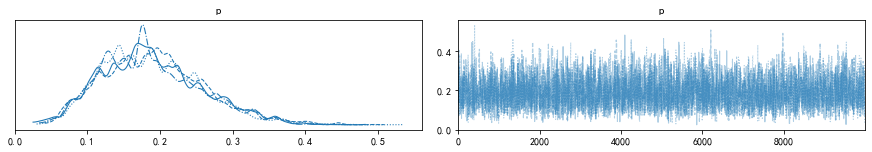

In [116]:
# 接下来，我们用MCMC方法来求解后验，当然，也可以采用共轭分布的方法直接求，但是实际中的
with coin_model:
    # don't worry about this:
    step = pm.Metropolis() 
    # focus on this, the Inference Button:
    coin_trace = pm.sample(10000, step=step)
    az.plot_trace(coin_trace)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


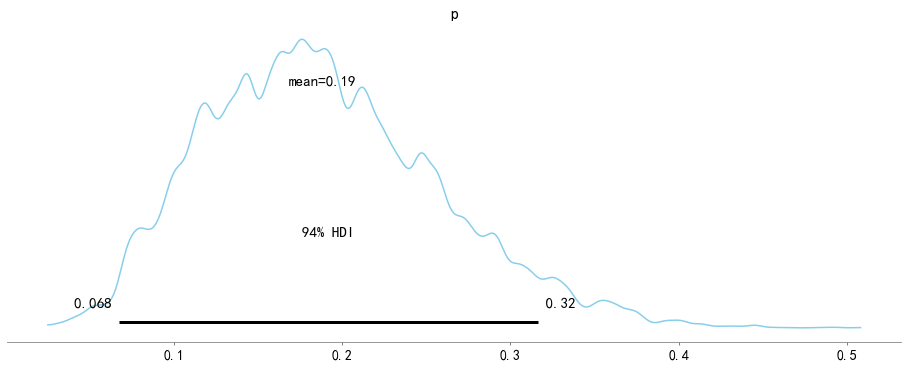

In [117]:
az.plot_posterior(coin_trace[2000:], color='#87ceeb', point_estimate='mean')
plt.show()

## 第一步，导入必要的包

In [9]:
import pandas as pd
import numpy as np
import arviz as az

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

import pymc3 as pm
import theano.tensor as tt

## 第二步数据导入并观察

In [80]:
# 数据导入及数据观察
count_data = pd.read_csv("lesson4.csv",encoding='gbk')
count_data['时间']=pd.to_datetime(count_data['时间'])
count_data
count_data[count_data.折扣==0.85]

,时间,销量,售价,折扣
41,2020-06-11,14,39,0.85
42,2020-06-12,33,39,0.85
43,2020-06-13,30,39,0.85
44,2020-06-14,35,39,0.85
45,2020-06-15,50,39,0.85
46,2020-06-16,49,39,0.85
47,2020-06-17,16,39,0.85
48,2020-06-18,53,39,0.85
49,2020-06-19,22,39,0.85
50,2020-06-20,21,39,0.85


In [81]:
count_data.describe()

,销量,售价,折扣
count,74.000000,74.0,74.000000
mean,19.918919,39.0,0.933108
std,10.763659,0.0,0.075069
min,6.000000,39.0,0.850000
25%,12.250000,39.0,0.850000
50%,17.000000,39.0,1.000000
75%,24.000000,39.0,1.000000
max,53.000000,39.0,1.000000


Text(0.5, 1.0, '销量是否有变化')

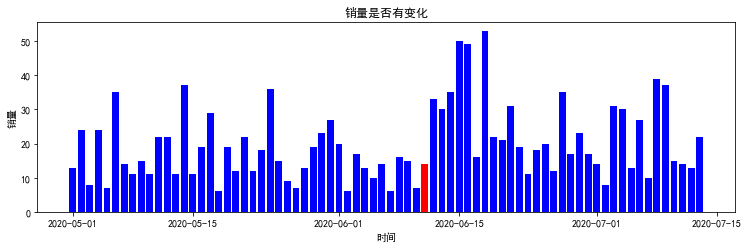

In [82]:
figsize(12.5, 3.5)
n_count_data = len(count_data)
plt.bar(count_data['时间'], count_data['销量'], color="blue")
plt.bar(count_data['时间'][41], count_data['销量'][41], color="red")
plt.xlabel("时间")
plt.ylabel("销量")
plt.title("销量是否有变化")
#plt.xlim(0, n_count_data);

In [83]:
# 传统的频率方法
# 是确定的频率，用的是t-test
from scipy import stats
data1=count_data['销量'][0:42]
data2=count_data['销量'][42:]
stats.levene(data1,data2) # 方差齐性检验

LeveneResult(statistic=5.097983687396781, pvalue=0.026986074597829462)

In [84]:
# T-test 比较两个平均数的差异是否显著，是判断样本的均值是否严重偏离一个预定的值
stats.ttest_ind(data1,data2,equal_var=False)

Ttest_indResult(statistic=-3.271712949552365, pvalue=0.0019193352702766276)

In [15]:
mean1=np.mean(data1.values).round(0)
mean2=np.mean(data2.values).round(0)
print(mean1,mean2)

16.0 25.0


## 第三步 基于贝叶斯的销量变化判断

### step1 场景考虑——对购买行为的判断

考虑什么样的随机变量可能描述这些统计数据？由于销量变化是一个离散的随机过程，自然考虑用泊松分布，每次购买不是连续的行为，每个人的购买也不是正态化的分布

为什么选择Poisson？1 离散的时间序列；2 是否购买是二元的；3 平均数仅与一个参数有关，且这个参数值随着平均数大而大
$$ C_i \sim \text{Poisson}(\lambda)  $$

因为我们考虑的是在策略实施前后是否有明显的销量变化，那么，我们就需要有两个$\lambda$，以及一个转换的位置（时间）$\tau$，也许在更长的时间上，我们需要三个，看策略实施的影响，这里我们做简化处理，如果两个$\lambda$一样，则策略影响小
$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

整个过程，就会变成利用贝叶斯完成的参数的统计推断上，通过样本信息和先验，来看后验被如何修正

### step2 参数的先验分布及超参数的选择

由于我们并不知道$\lambda$的具体值，依据我们前面学到的，贝叶斯对于一切的参数，都持概率上的假定，那么这两个值最好也服从一定的分布，在之前我们判断是否有效，一般是用平均值，那在这里，我们就用正态分布来模拟，简化起见，两个$\mu$，分别是策略前后的销量的平均数，$\sigma$则是10，当然，如果我们足够谨慎，可以令$\mu_1,\mu_2$等于0，这样，则全部信息由测试数据来给出，

如果是有主观先验的话

\begin{align}
&\lambda_1 \sim \text{TruncatedNormal}( \mu_1,10^2,lower=0 ) \\\
&\lambda_2 \sim \text{TruncatedNormal}( \mu_2,10^2,lower=0 )
\end{align}


针对$\tau$，也就是在哪一天转折，我们不带主观的来看，将它定位从第一天到最后一天的均匀分布，
\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}


### 利用pymc3 完成建模
整个分析过程看上去还是很复杂的，直接套用贝叶斯公式去解是困难的

在这里，我们将利用python的pymc3概率编程的包来完成模型的构建和后验概率的模拟

In [85]:
# 用with上下文管理器来做，其中定义一个model容器，来放上述的各个变量,这里面的值都是随机的
# 首先是有关lambda
with pm.Model() as model_exp:
    mu1 = count_data['销量'][:41].mean()
    mu2 = count_data['销量'][41:].mean()
    lambda_1 = pm.TruncatedNormal("lambda_1", mu=mu1,sigma=100,lower=0)
    lambda_2 = pm.TruncatedNormal("lambda_2", mu=mu2,sigma=100,lower=0)
    # 这里我们用的是均匀分布
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [95]:
# 这里产生的是我们想要的$\lambda$,它是根据我们的日期来的，不同日期下，会产生随机的
# 这里是有关tau
with model_exp:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [96]:
# 训练的样本，是我们的观察到的销量变化
with model_exp:
    observation = pm.Poisson("obs", lambda_, observed=count_data['销量'])

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 47 seconds.
The number of effective samples is smaller than 25% for some parameters.


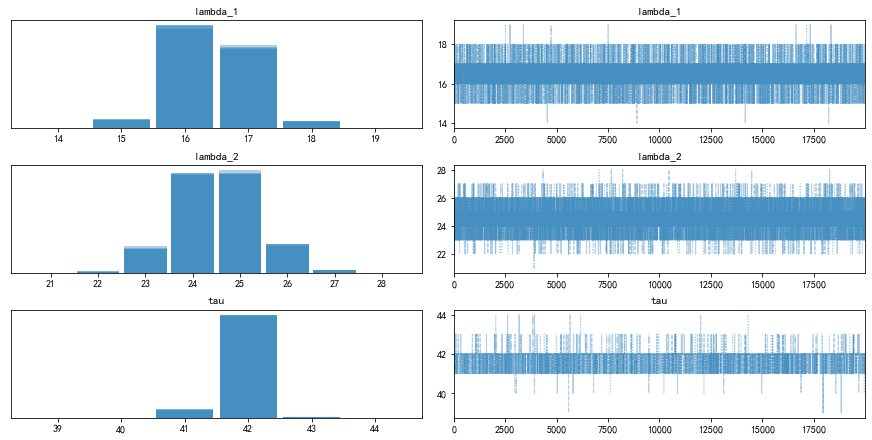

In [97]:
# 训练，是用的MCMC方法，对于初学者来说，知道它是干嘛的就行，其中的抽样方法，包括H-M，gibbs分析
# 这里，我们用MCMC来求出上面的各种参数
### Mysterious code to be explained in Chapter 3.
with model_exp:
    step = pm.Metropolis()
    trace = pm.sample(20000,step=step)
    az.plot_trace(trace)

## 结果展示

In [98]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

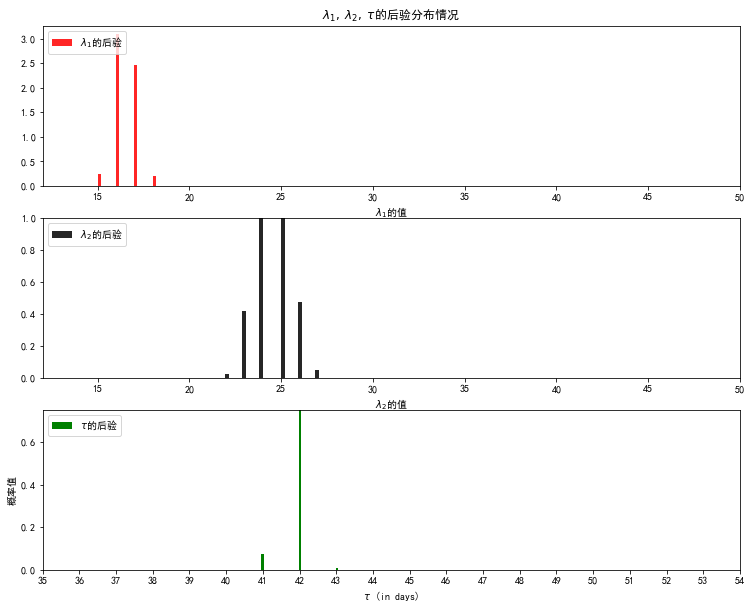

In [99]:
figsize(12.5, 10)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#histogram of the samples:
ax.set_autoscaley_on(False)

ax = plt.subplot(311)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$的后验", color="red", density=True)
plt.legend(loc="upper left")
plt.title(r"""$\lambda_1,\;\lambda_2,\;\tau$的后验分布情况""")
plt.xlim([12, 50])
plt.xlabel("$\lambda_1$的值")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$的后验", color="black", density=True)
plt.legend(loc="upper left")
plt.xlim([12, 50])
plt.xlabel("$\lambda_2$的值")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"$\tau$的后验",
         color="green", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("概率值");

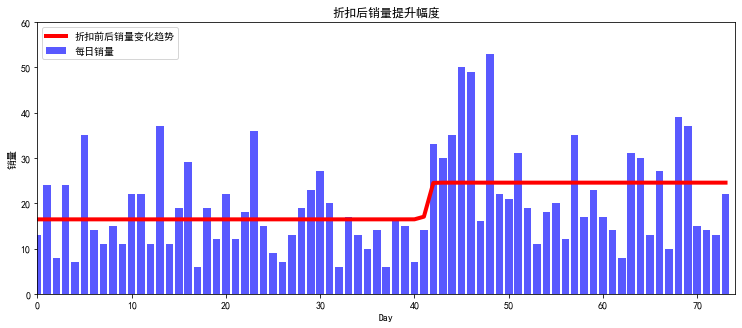

In [100]:
figsize(12.5, 5)
N = tau_samples.shape[0]
expected_sales_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_sales_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N
plt.plot(range(n_count_data), expected_sales_per_day, lw=4, color="red",
         label="折扣前后销量变化趋势")

plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("销量")
plt.title("折扣后销量提升幅度")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data['销量'], color="blue", alpha=0.65,
        label="每日销量")

plt.legend(loc="upper left")

如果不用主观先验呢？

\begin{align}
&\lambda_1 \sim \text{DiscreteUniform(min,max)}\\\
&\lambda_2 \sim \text{DiscreteUniform(min,max)}
\end{align}

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 47 seconds.
The number of effective samples is smaller than 25% for some parameters.


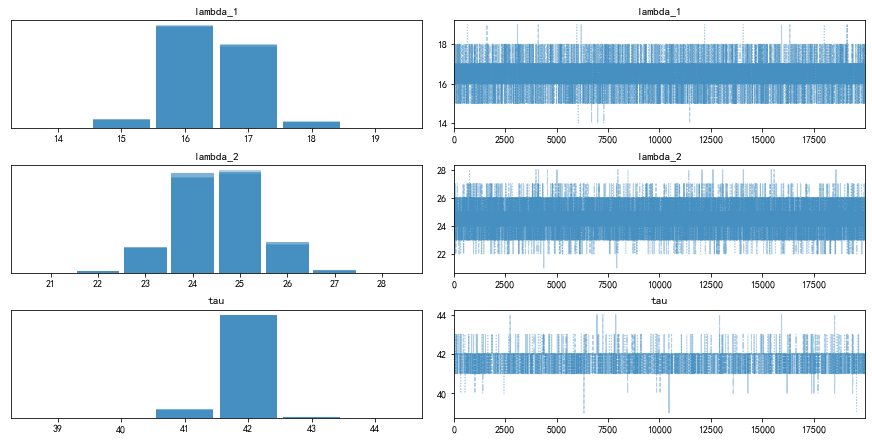

In [118]:
with pm.Model() as model_uni:
    mu1 = count_data['销量'].min()
    mu2 = count_data['销量'].max()
    lambda_1 = pm.DiscreteUniform("lambda_1",lower=mu1, upper=mu2)
    lambda_2 = pm.DiscreteUniform("lambda_2",lower=mu1, upper=mu2)
    # 这里我们用的是均匀分布
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data['销量'])
    
    step = pm.Metropolis()
    trace = pm.sample(20000,step=step)
    az.plot_trace(trace)

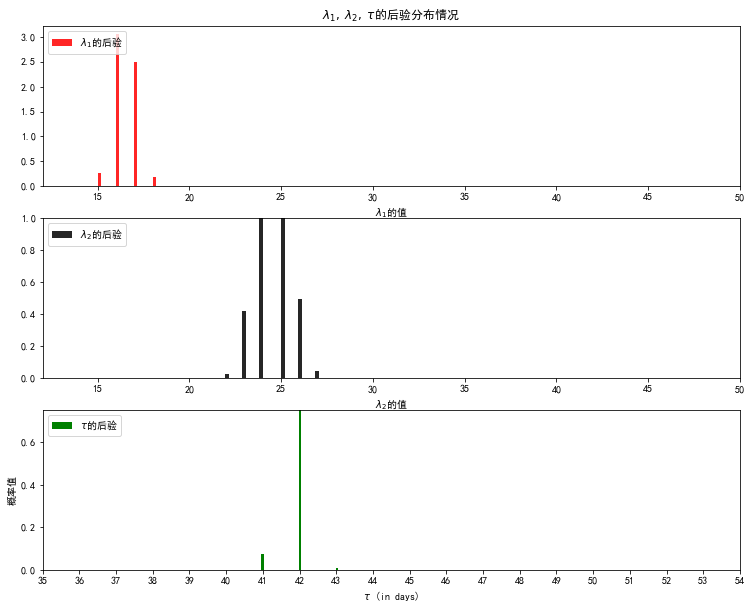

In [119]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

figsize(12.5, 10)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#histogram of the samples:
ax.set_autoscaley_on(False)

ax = plt.subplot(311)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$的后验", color="red", density=True)
plt.legend(loc="upper left")
plt.title(r"""$\lambda_1,\;\lambda_2,\;\tau$的后验分布情况""")
plt.xlim([12, 50])
plt.xlabel("$\lambda_1$的值")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$的后验", color="black", density=True)
plt.legend(loc="upper left")
plt.xlim([12, 50])
plt.xlabel("$\lambda_2$的值")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"$\tau$的后验",
         color="green", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("概率值");

### 到这里结束了么？

算到这里，其实并没有体现出贝叶斯的作用，我们接下来往下看一下

这次的策略持续了多久？也就是说，这个是否可以分成更多的部分？

In [101]:
with pm.Model() as model_exp_2:
    mu1=0 
    mu2=0 
    mu3=0 
    lambda_1 = pm.TruncatedNormal("lambda_1", mu=mu1,sigma=100,lower=0)
    lambda_2 = pm.TruncatedNormal("lambda_2", mu=mu2,sigma=100,lower=0)
    lambda_3 = pm.TruncatedNormal("lambda_3", mu=mu3,sigma=100,lower=0)
    # 这里我们用的是离散均匀分布
    tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data - 1)
    tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper=n_count_data)
    

In [102]:
with model_exp_2:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau_2 >= idx, pm.math.switch(tau_1 >= idx, lambda_1, lambda_2), lambda_3)

# 训练的样本，是我们的观察到的销量变化
with model_exp_2:
    observation = pm.Poisson("obs", lambda_, observed=count_data['销量'])

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau_2]
>Metropolis: [tau_1]
>Metropolis: [lambda_3]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 55 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


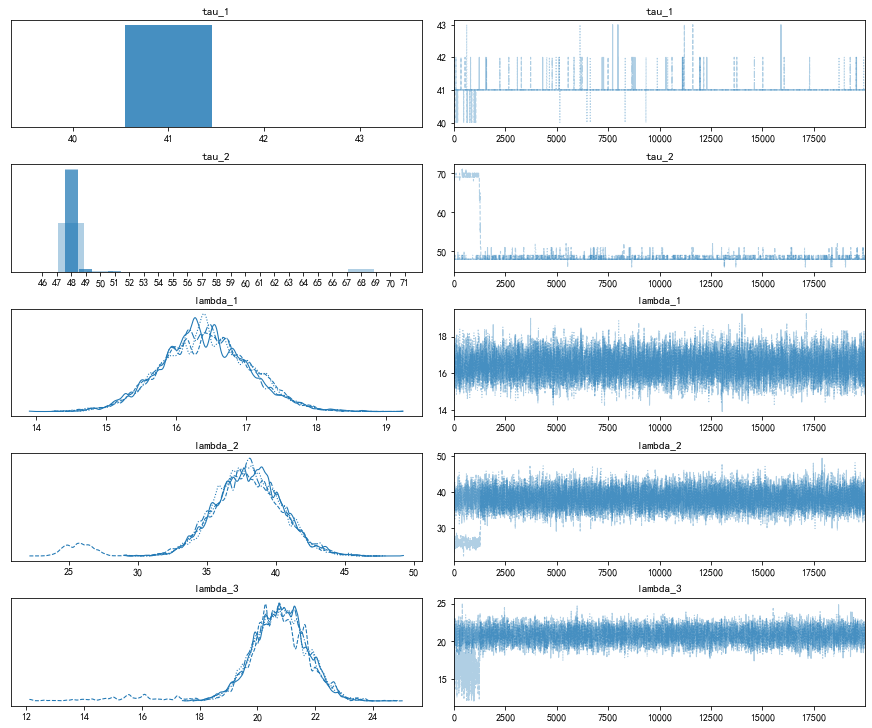

In [103]:
# 训练，是用的MCMC方法，对于初学者来说，知道它是干嘛的就行，其中的抽样方法，包括H-M，gibbs分析
# 这里，我们用MCMC来求出上面的各种参数
with model_exp_2:
    step = pm.Metropolis()
    trace = pm.sample(20000,step=step)
    az.plot_trace(trace)

In [104]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
lambda_3_samples = trace['lambda_3']

tau_1_samples = trace['tau_1']
tau_2_samples = trace['tau_2']

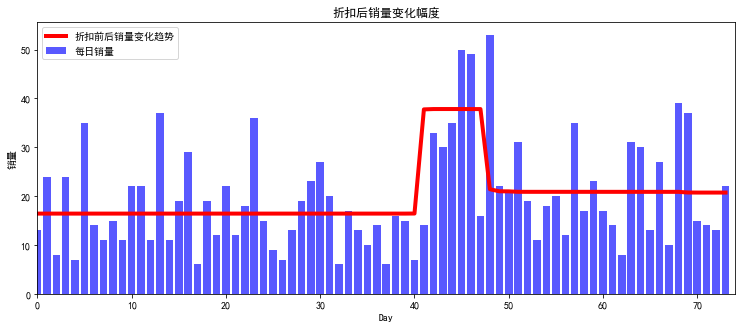

In [105]:
figsize(12.5, 5)
N = tau_1_samples.shape[0]
expected_sales_per_day = np.zeros(n_count_data)
for day in range(0,n_count_data):
    ix1= day<tau_1_samples
    ix2 = (day<tau_2_samples) & (day>=tau_1_samples)
    expected_sales_per_day[day]=(lambda_1_samples[ix1].sum()+lambda_2_samples[ix2].sum()+lambda_3_samples[~(ix1 | ix2)].sum())/ N
    
plt.plot(range(n_count_data), expected_sales_per_day, lw=4, color="red",
         label="折扣前后销量变化趋势")

plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("销量")
plt.title("折扣后销量变化幅度")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data['销量'], color="blue", alpha=0.65,
        label="每日销量")

plt.legend(loc="upper left")
